# Analysis of Mortality Rates

The objective of this notebook is to analyze the mortality rates computed from previous steps.

- What are the differences and similarities between crude and age-standardized rates? (Distribution)
- What are the provinces of concern?
- Map of age-standardized rates.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/SMSL/COVID-19 Mortality Rates

Mounted at /content/drive
/content/drive/My Drive/SMSL/COVID-19 Mortality Rates


In [3]:
sns.set_context("paper")

## Comparison of Distributions: Crude and Age-Standardized Rates

### Central Tendency and Spread

In [4]:
# Mortality Rates
df = pd.read_excel("output/mortality_rates.xlsx", index_col=0)
df = df.rename(columns={
    "crude per 100k": "Crude",
    "age-standardized per 100k": "Age-Standardized"
})
df

,Crude,Age-Standardized
ABRA,62.322969,47.368369
AGUSAN DEL NORTE,78.587174,77.397950
AGUSAN DEL SUR,45.122501,50.589968
AKLAN,41.110304,33.988423
ALBAY,27.029981,25.471226
...,...,...
TAWI-TAWI,1.368161,2.221281
ZAMBALES,90.710054,81.157044
ZAMBOANGA DEL NORTE,27.819816,27.468587
ZAMBOANGA DEL SUR,53.375148,57.170267


In [5]:
df.describe()

,Crude,Age-Standardized
count,84.000000,84.000000
mean,53.370224,51.274175
std,38.900550,36.634483
min,1.368161,2.221281
25%,22.315531,24.783053
50%,48.292219,44.732534
75%,73.069816,67.430628
max,211.033297,207.832506


In [6]:
# IQR
df.quantile(0.75) - df.quantile(0.25)

Crude               50.754285
Age-Standardized    42.647575
dtype: float64

Crude rates has higher median and is more spread (IQR 50.75).

### Normality

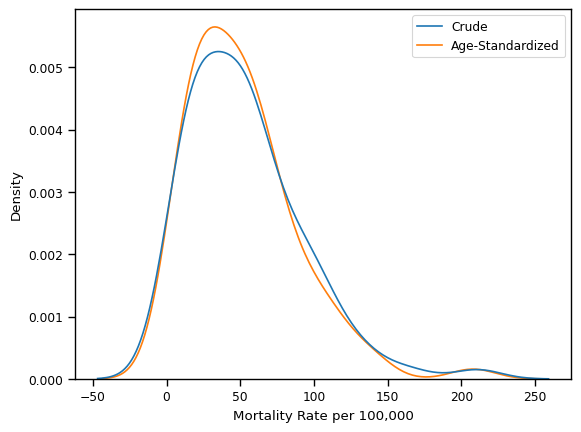

In [7]:
sns.kdeplot(df).set(xlabel="Mortality Rate per 100,000")
plt.savefig('output/distribution_comparison.png', dpi=300, transparent=False, bbox_inches='tight')

Both curves looks normal but are skewed to the right (mean > median).

In [8]:
print("Crude:", stats.shapiro(df['Crude']))
print("Age-Standardized:", stats.shapiro(df['Age-Standardized']))

Crude: ShapiroResult(statistic=0.9101653099060059, pvalue=2.2053616703487933e-05)
Age-Standardized: ShapiroResult(statistic=0.9052783846855164, pvalue=1.3273908734845463e-05)


statistic is close to 1. p-value: not enough evidence to reject the null hypothesis (data was taken from normal dist). almost normal...

[Text(0, 0.5, 'Mortality Rate per 100,000')]

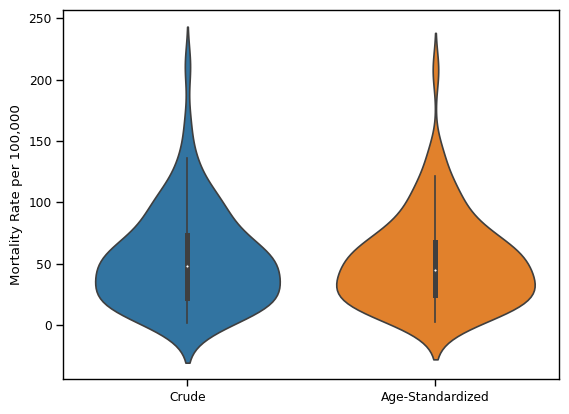

In [9]:
sns.violinplot(df).set(ylabel="Mortality Rate per 100,000")

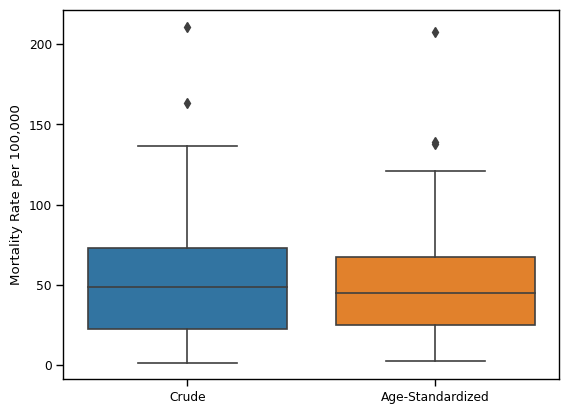

In [10]:
sns.boxplot(df).set(ylabel="Mortality Rate per 100,000")
plt.savefig('output/boxplot_comparison.png', dpi=300, transparent=False, bbox_inches='tight')

### Difference between the Distributions

In [11]:
# Difference in scores
difference = pd.DataFrame()
difference['Crude'] = df['Crude']
difference['Age-Standardized'] = df['Age-Standardized']
difference['Difference'] = df['Crude'] - df['Age-Standardized']
difference = difference.sort_values(by='Difference')
difference

,Crude,Age-Standardized,Difference
COTABATO CITY,47.451924,78.790450,-31.338525
LANAO DEL SUR,19.757105,40.929470,-21.172365
MAGUINDANAO,10.731741,24.344983,-13.613243
CITY OF ISABELA,45.339276,57.343646,-12.004370
BASILAN,11.526401,21.319757,-9.793356
...,...,...,...
LA UNION,79.722750,62.803418,16.919332
ILOILO,81.891052,64.575849,17.315203
GUIMARAS,102.891628,82.653656,20.237972
CAGAYAN,163.171453,139.275997,23.895456


In [12]:
difference.describe().to_excel("output/summary.xlsx")
difference.describe()

,Crude,Age-Standardized,Difference
count,84.000000,84.000000,84.000000
mean,53.370224,51.274175,2.096049
std,38.900550,36.634483,8.853921
min,1.368161,2.221281,-31.338525
25%,22.315531,24.783053,-2.332762
50%,48.292219,44.732534,1.253540
75%,73.069816,67.430628,7.224624
max,211.033297,207.832506,24.986568


In [13]:
# Save File
difference.to_excel("output/difference.xlsx")

<Axes: xlabel='Difference', ylabel='Density'>

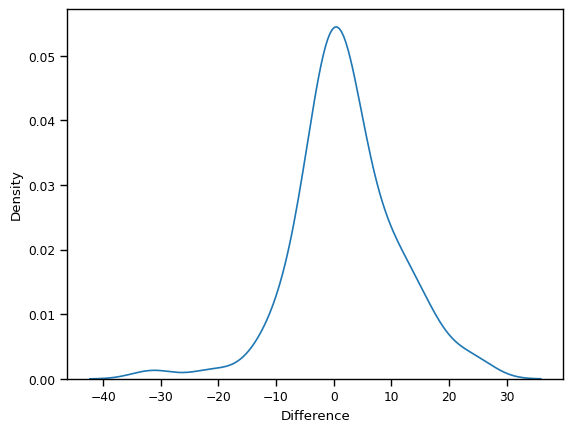

In [14]:
sns.kdeplot(difference['Difference'])

In [15]:
# Shapiro-Wilk Test
stats.shapiro(difference['Difference'])

ShapiroResult(statistic=0.9543735384941101, pvalue=0.004711009096354246)

Statistic is close to 1 but null hypothesis is rejected ==> not normally distributed? Hmm

### Highest and Lowest Shifts

Cotabato City (-31.34), Northern Samar (-0.07), and Ilocos Norte (24.99).

In [16]:
# provincial and PH population data
cotabato_city = pd.read_excel("output/age_specific_mortality_rates.xlsx", sheet_name="COTABATO CITY", index_col=0)
northern_samar = pd.read_excel("output/age_specific_mortality_rates.xlsx", sheet_name="NORTHERN SAMAR", index_col=0)
ilocos_norte = pd.read_excel("output/age_specific_mortality_rates.xlsx", sheet_name="ILOCOS NORTE", index_col=0)
ph_population = pd.read_excel("data/PH_population.xlsx", index_col=0)['Population']
# cotabato_city

          Cotabato City  Ilocos Norte  Philippines
0 to 4         0.117755      0.076505     0.101841
5 to 9         0.110846      0.080878     0.103682
10 to 14       0.106376      0.090771     0.101969
15 to 19       0.110794      0.088750     0.096250
20 to 24       0.112674      0.085590     0.091747
25 to 29       0.099846      0.079271     0.084413
30 to 34       0.076690      0.074600     0.074729
35 to 39       0.063909      0.072571     0.066067
40 to 44       0.054622      0.064804     0.059736
45 to 49       0.042944      0.058078     0.051268
50 to 54       0.033811      0.054836     0.045476
55 to 59       0.023658      0.046571     0.037952
60 to 64       0.018229      0.038910     0.030987
65 to 69       0.011989      0.029709     0.022026
70 to 74       0.007811      0.022003     0.014497
75 to 79       0.003818      0.016021     0.008564
80+            0.004228      0.020131     0.008797


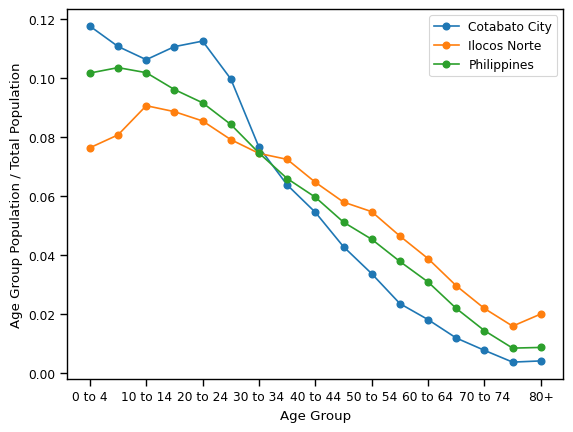

In [17]:
# normalized population distributions
normalized_population = pd.DataFrame()
normalized_population['Cotabato City'] = cotabato_city['population'] / cotabato_city['population'].sum()
# normalized_population['Northern Samar'] = northern_samar['population'] / northern_samar['population'].sum()
normalized_population['Ilocos Norte'] = ilocos_norte['population'] / ilocos_norte['population'].sum()
normalized_population['Philippines'] = ph_population / ph_population.sum()
print(normalized_population)
normalized_population.plot(style="o-").set(ylabel="Age Group Population / Total Population", xlabel="Age Group")
plt.savefig('output/highest_shift_population_comparison.png', dpi=300, transparent=False, bbox_inches='tight')

Cotabato City has lower elderly % than the national distribution. Meanwhile, Ilocos Norte has a higher elderly % than the national distribution. This explains the increase in Cotabato City's age-standardized rates and decrease in Ilocos Norte's. Meanwhile, Northern Samar's elderly distribution is close to that of the national distribution; the results varied less (<1).

## Provinces of Concern: Highest Mortality Rates



### Top 10 Provinces

In [18]:
# Highest 10
sorted_rates = df['Age-Standardized'].sort_values(ascending=False)
sorted_rates.head(10)

BENGUET          207.832506
CAGAYAN          139.275997
BATAAN           137.883440
NUEVA VIZCAYA    121.070666
QUIRINO          115.119705
NCR              109.866440
ISABELA          108.247201
CEBU             107.510508
AURORA            97.248888
DAVAO DEL SUR     96.785503
Name: Age-Standardized, dtype: float64

In [19]:
# Lowest 10
sorted_rates.tail(10)

CATANDUANES           12.768198
SOUTHERN LEYTE        12.302711
SULTAN KUDARAT        11.925700
CAMIGUIN              11.050271
SARANGANI             10.570993
CAMARINES NORTE        8.697143
MISAMIS OCCIDENTAL     7.720111
MASBATE                4.819455
SULU                   2.628742
TAWI-TAWI              2.221281
Name: Age-Standardized, dtype: float64

### Comparison of Benguet and other Provinces with Big Cities from Top 10

In [20]:
# All Provinces
age_specific_rates = pd.ExcelFile("output/age_specific_mortality_rates.xlsx")
all_provinces = pd.DataFrame()
populations = pd.DataFrame()
for province in age_specific_rates.sheet_names:
    all_provinces[province] = age_specific_rates.parse(province, index_col=0)['m / p']
    populations[province] = age_specific_rates.parse(province, index_col=0)['population']

           Benguet       NCR      Cebu  Davao del Sur    Median
0 to 4    0.000281  0.000087  0.000144       0.000129  0.000048
5 to 9    0.000082  0.000019  0.000021       0.000029  0.000005
10 to 14  0.000094  0.000036  0.000043       0.000041  0.000013
15 to 19  0.000064  0.000067  0.000066       0.000071  0.000020
20 to 24  0.000130  0.000104  0.000140       0.000090  0.000051
25 to 29  0.000295  0.000207  0.000287       0.000215  0.000087
30 to 34  0.000536  0.000272  0.000376       0.000293  0.000144
35 to 39  0.000946  0.000396  0.000590       0.000514  0.000207
40 to 44  0.001923  0.000638  0.000805       0.000674  0.000298
45 to 49  0.002345  0.000959  0.001369       0.001077  0.000462
50 to 54  0.003842  0.001630  0.002122       0.002001  0.000648
55 to 59  0.005423  0.002525  0.003076       0.003045  0.001249
60 to 64  0.007329  0.004013  0.004207       0.003856  0.001876
65 to 69  0.012795  0.006659  0.006566       0.005591  0.002802
70 to 74  0.017698  0.010057  0.008593  

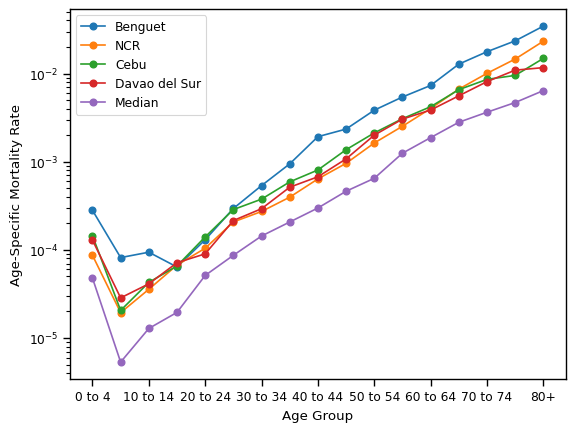

In [21]:
# Age-specific Rates
comparison_mortality = pd.DataFrame()
comparison_mortality["Benguet"] = all_provinces["BENGUET"]
comparison_mortality["NCR"] = all_provinces["NCR"]
comparison_mortality["Cebu"] = all_provinces["CEBU"]
comparison_mortality["Davao del Sur"] = all_provinces["DAVAO DEL SUR"]
comparison_mortality["Median"] = all_provinces.median(axis=1)
comparison_mortality.plot(style="o-").set(yscale="log", ylabel="Age-Specific Mortality Rate", xlabel="Age Group")
print(comparison_mortality)
plt.savefig('output/highest_rates_comparison.png', dpi=300, transparent=False, bbox_inches='tight')

           Benguet       NCR      Cebu  Davao del Sur    Median
0 to 4    0.086520  0.095456  0.104048       0.101123  0.101951
5 to 9    0.089276  0.092316  0.104493       0.100136  0.108127
10 to 14  0.090495  0.087779  0.100520       0.099153  0.106983
15 to 19  0.095203  0.083286  0.095091       0.091375  0.099478
20 to 24  0.102654  0.095154  0.094659       0.095110  0.093494
25 to 29  0.094920  0.096106  0.089902       0.089246  0.079483
30 to 34  0.083937  0.086800  0.077312       0.080825  0.071758
35 to 39  0.073282  0.075173  0.066781       0.068302  0.062282
40 to 44  0.060684  0.066085  0.058400       0.061113  0.057708
45 to 49  0.050277  0.055326  0.049619       0.051545  0.051104
50 to 54  0.046833  0.048375  0.042587       0.043843  0.044487
55 to 59  0.040350  0.039387  0.036221       0.036585  0.036833
60 to 64  0.032178  0.031417  0.029134       0.031116  0.030337
65 to 69  0.022137  0.020863  0.021340       0.022261  0.022039
70 to 74  0.013875  0.013138  0.013649  

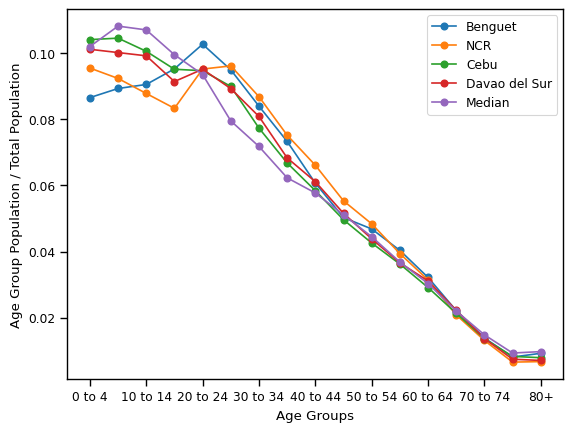

In [22]:
# Populations
comparison_population = pd.DataFrame()
comparison_population["Benguet"] = populations["BENGUET"] / populations["BENGUET"].sum()
comparison_population["NCR"] = populations["NCR"] / populations["NCR"].sum()
comparison_population["Cebu"] = populations["CEBU"] / populations["CEBU"].sum()
comparison_population["Davao del Sur"] = populations["DAVAO DEL SUR"] / populations["DAVAO DEL SUR"].sum()
# comparison_population['Philippines'] = ph_population / ph_population.sum()
comparison_population["Median"] = populations.median(axis=1) / populations.median(axis=1).sum()
comparison_population.plot(style="o-").set(ylabel="Age Group Population / Total Population", xlabel="Age Groups")
print(comparison_population)
plt.savefig('output/highest_rates_population_comparison.png', dpi=300, transparent=False, bbox_inches='tight')

## Age-Specific Rates

In [38]:
summary_age_specific = all_provinces * 100000
summary_age_specific = summary_age_specific.T.describe().T
summary_age_specific.to_excel("output/summary_age_specific.xlsx")
summary_age_specific

,count,mean,std,min,25%,50%,75%,max
0 to 4,84.0,7.223297,7.806059,0.000000,2.150140,4.786785,9.612693,45.072962
5 to 9,84.0,1.502362,2.338596,0.000000,0.000000,0.532459,1.947129,11.057054
10 to 14,84.0,2.137960,3.102925,0.000000,0.000000,1.282612,2.420340,21.652052
15 to 19,84.0,2.909161,3.358416,0.000000,0.000000,1.951821,4.465066,18.851030
20 to 24,84.0,6.084703,4.939959,0.000000,2.489445,5.124941,8.420605,25.790922
25 to 29,84.0,11.727720,10.704417,0.000000,4.769544,8.673845,16.290522,50.438818
30 to 34,84.0,15.775171,11.815591,0.000000,7.844382,14.350986,21.506470,53.585911
35 to 39,84.0,24.055451,21.561234,0.000000,7.050283,20.696790,33.976462,107.360134
40 to 44,84.0,35.433196,31.625073,0.000000,15.239429,29.840756,46.042465,192.307692
45 to 49,84.0,58.604399,48.052742,0.000000,23.960865,46.227327,69.629752,234.531783


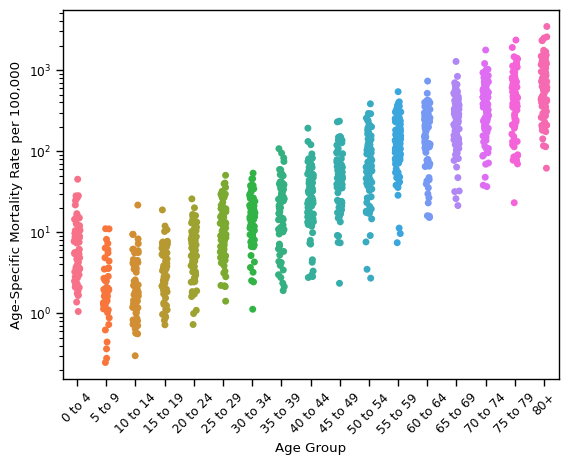

In [41]:
# All
comparison_mortality = all_provinces.T * 100000
# comparison_mortality = all_provinces.T
plt.xticks(rotation=45)
sns.stripplot(comparison_mortality).set(yscale="log", ylabel="Age-Specific Mortality Rate per 100,000", xlabel="Age Group")
median = all_provinces.median(axis=1)
plt.savefig('output/age_specific_rates.png', dpi=300, transparent=False, bbox_inches='tight')

[None, Text(0, 0.5, 'Age-Specific Mortality Rate'), Text(0.5, 0, 'Age Group')]

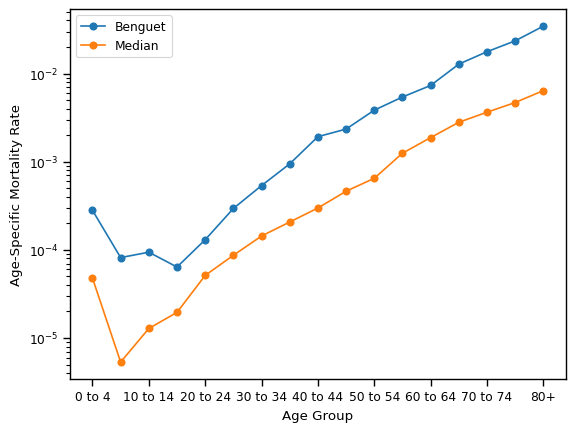

In [24]:
# Benguet
comparison_mortality = pd.DataFrame()
comparison_mortality["Benguet"] = all_provinces["BENGUET"].T
comparison_mortality["Median"] = all_provinces.median(axis=1)
comparison_mortality.plot(style="o-").set(yscale="log", ylabel="Age-Specific Mortality Rate", xlabel="Age Group")